# Module 6 - Clustering for Diverse portfolio analysis

Clustering is a method of unsupervised learning and is a common technique for statistical data analysis used in many fields.

Clustering is a Machine Learning technique that involves the grouping of data points. Given a set of data points, we can use a clustering algorithm to classify each data point into a specific group. In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features.

In financial Markets, Cluster analysis is a technique used to group sets of objects that share similar characteristics. It is common in statistics, but investors will use the approach to build a diversified portfolio. Stocks that exhibit high correlations in returns fall into one basket, those slightly less correlated in another, and so on, until each stock is placed into a category.

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans, vq

### Query 6.1 
Create a table/dataframe with the closing prices of 30 different stocks, with 10 from each of the caps

In [94]:
dict = {
    'TCS': 'TCS',
    'TITAN':'TITAN',
    'RELIANCE':'RELIANCE',
    'MARUTI':'MARUTI',
    'INFY':'Infosys',
    'HEROMOTOCO':'Hero',
    'HDFC':'HDFC',
    'GAIL':'GAIL',
    'CIPLA':'Cipla',
    'BAJFINANCE':'BajajFin',
    
    'VOLTAS':'Voltas',
    'TATACHEM':'TataChem',
    'TATAPOWER':'TataPow',
    'PNB':'PNB',
    'MINDTREE':'Mindtree',
    'JINDALSTEL':'Jindalsteel',
    'IGL':'IGL',
    'IDBI':'IDBI',
    'APOLLOTYRE':'Apolotyre',
    'ADANIPOWER':'AdaniPower',
    
    'VENKEYS':'Venkeys',
    'SUZLON':'Suzlon',
    'RCOM':'Rcom',
    'RAYMOND':'Raymond',
    'PVR':'PVR',
    #'LEMONTREE':'Lemontree',
    'JKLAKSHMI':'JKL',
    #'IRCON':'IRCON',
    'FORTIS':'Fortis',
    'BAJAJELEC':'Bajajelec'
    
}

In [95]:
files, names = np.array(sorted(dict.items())).T

In [96]:
quotes = []
for file in files:
    quotes.append(pd.read_csv(file + '.csv'))
    
for i, q in enumerate(quotes):
    quotes[i] = quotes[i][quotes[i].Series == 'EQ']
    #print(i, " : ",len(quotes[i]))
    
close = np.vstack([q['Close Price'] for q in quotes])

In [97]:
prices = pd.DataFrame(close)
prices = prices.T
prices.columns = names

In [98]:
prices.head()

,AdaniPower,Apolotyre,Bajajelec,BajajFin,Cipla,Fortis,GAIL,HDFC,Hero,IDBI,...,Raymond,Rcom,RELIANCE,Suzlon,TataChem,TataPow,TCS,TITAN,Venkeys,Voltas
0,30.25,231.90,341.15,1332.95,569.00,205.25,414.00,1559.50,3515.45,75.05,...,772.80,32.00,1344.10,19.6,629.80,83.55,2365.10,483.65,1169.70,431.85
1,32.85,234.40,347.00,1347.75,565.60,207.90,411.40,1566.55,3619.40,76.65,...,785.00,32.10,1356.30,19.7,643.90,83.85,2429.15,488.30,1177.00,432.45
2,33.10,237.35,349.85,1324.80,562.35,205.90,408.30,1552.50,3645.95,75.95,...,783.65,31.95,1353.10,19.9,638.10,85.35,2455.35,481.75,1188.00,430.20
3,31.90,232.65,334.10,1314.55,560.10,196.85,404.75,1537.05,3592.05,69.95,...,746.95,31.05,1327.35,20.0,624.90,83.75,2536.20,471.65,1156.90,414.10
4,32.40,234.65,336.20,1289.15,564.95,203.55,401.05,1520.60,3571.65,68.75,...,723.10,30.55,1318.85,20.6,616.45,84.15,2507.15,471.15,1161.65,415.75


### Query6.2
Calculate average annual percentage return and volatility of all 30 stocks over a theoretical one year period


In [99]:
data = prices.pct_change().mean() * 252
data = pd.DataFrame(data)
data.columns = ['Returns']
data['Volitality'] = prices.pct_change().std()*np.sqrt(252)
data
data_df = data

### Query6.3
Cluster the 30 stocks according to their mean annual Volatilities and Returns using K-means clustering. Identify the optimum number of clusters using the Elbow curve method


In [100]:
data_array = np.asarray([np.asarray(data['Returns']), np.asarray(data['Volitality'])]).T

data_array = np.where(np.isnan(data_array), 0, data_array)
data_array

array([[ 0.30527262,  0.6105322 ],
       [-0.06430261,  0.31044457],
       [ 0.31605318,  0.40241355],
       [ 0.4543322 ,  0.32105847],
       [ 0.01181652,  0.25445666],
       [-0.14598944,  0.42125042],
       [-0.0525509 ,  0.33842468],
       [ 0.13794545,  0.21455739],
       [-0.14354459,  0.23914078],
       [-0.29600826,  0.45378729],
       [-0.1585044 ,  0.64860484],
       [-0.02361697,  0.41899354],
       [ 0.27537097,  0.49297985],
       [-0.1688651 ,  0.27966808],
       [ 0.00393675,  0.22545935],
       [ 0.39256977,  0.34148514],
       [-0.23944009,  0.54538954],
       [ 0.11108968,  0.31019811],
       [ 0.07002052,  0.36383449],
       [-0.88172863,  0.98536613],
       [ 0.08731772,  0.4392332 ],
       [-0.46815166,  0.59355622],
       [-0.01744461,  0.24193754],
       [-0.10056397,  0.30857864],
       [ 0.07502698,  0.43161712],
       [ 0.49159269,  0.32483565],
       [ 0.38171065,  0.62738334],
       [ 0.19103016,  0.30834649]])

In [101]:
X = data_array
wcss = []

for k in range(2, 20):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

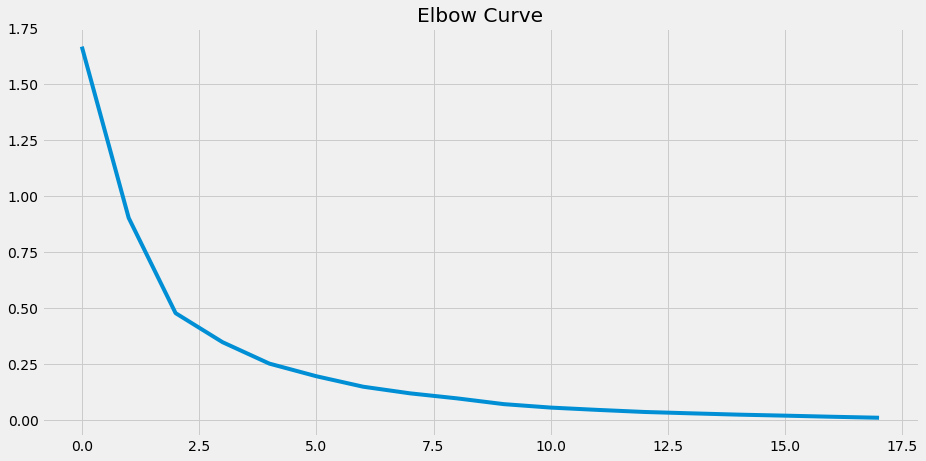

In [102]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14, 7))
plt.plot(wcss)
plt.title('Elbow Curve')
plt.show()

In K-means clustering the critical part is to decide how many clusters do we want to divide our data into.

For this purpose "Elbow Curve" is used. It is a relationship between number of clusters we select and the Sum of Squared Errors (SSE) resulting from using that number of clusters called as __within cluster sum of squares__.

Here, from above curve both 4 clusters seem appropriate.

In [103]:
centroids,_ = kmeans(data_array, 4)
idx,_ = vq(data_array, centroids)

data = data_array

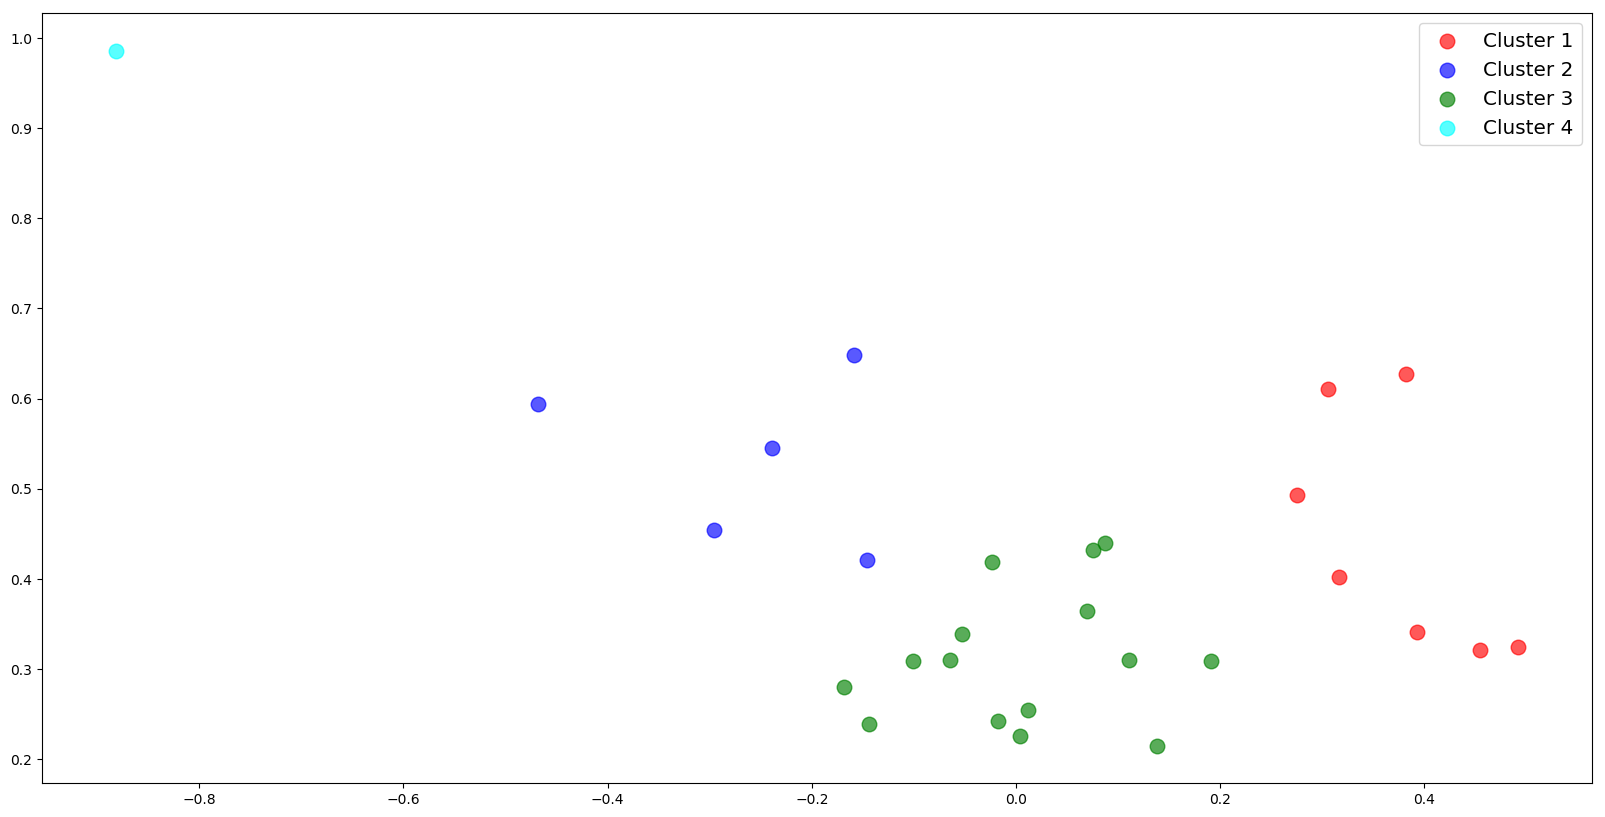

In [104]:
plt.style.use('default')
plt.figure(figsize=(20, 10))
plt.scatter(X[idx==0,0],X[idx==0,1],s=110,c='red',label='Cluster 1',alpha=0.65)
plt.scatter(X[idx==1,0],X[idx==1,1],s=110,c='blue',label='Cluster 2',alpha=0.65)
plt.scatter(X[idx==2,0],X[idx==2,1],s=110,c='green',label='Cluster 3',alpha=0.65)
plt.scatter(X[idx==3,0],X[idx==3,1],s=110,c='cyan',label='Cluster 4',alpha=0.65)
plt.legend(fontsize='x-large')
plt.show()

### Query6.4
Prepare a separate Data frame to show which stocks belong to the same cluster 

In [106]:
data_df

,Returns,Volitality
AdaniPower,0.305273,0.610532
Apolotyre,-0.064303,0.310445
Bajajelec,0.316053,0.402414
BajajFin,0.454332,0.321058
Cipla,0.011817,0.254457
Fortis,-0.145989,0.421250
GAIL,-0.052551,0.338425
HDFC,0.137945,0.214557
Hero,-0.143545,0.239141
IDBI,-0.296008,0.453787


In [110]:
clusters = [(name, cluster) for name, cluster in zip(data_df.index, idx)]

In [111]:
df = pd.DataFrame.from_records(clusters, columns=['Stock', 'Cluster'])
df.Cluster = df.Cluster+1
df.sort_values('Cluster')

,Stock,Cluster
0,AdaniPower,1
25,TITAN,1
2,Bajajelec,1
3,BajajFin,1
26,Venkeys,1
12,Jindalsteel,1
15,Mindtree,1
10,IGL,2
9,IDBI,2
21,Suzlon,2


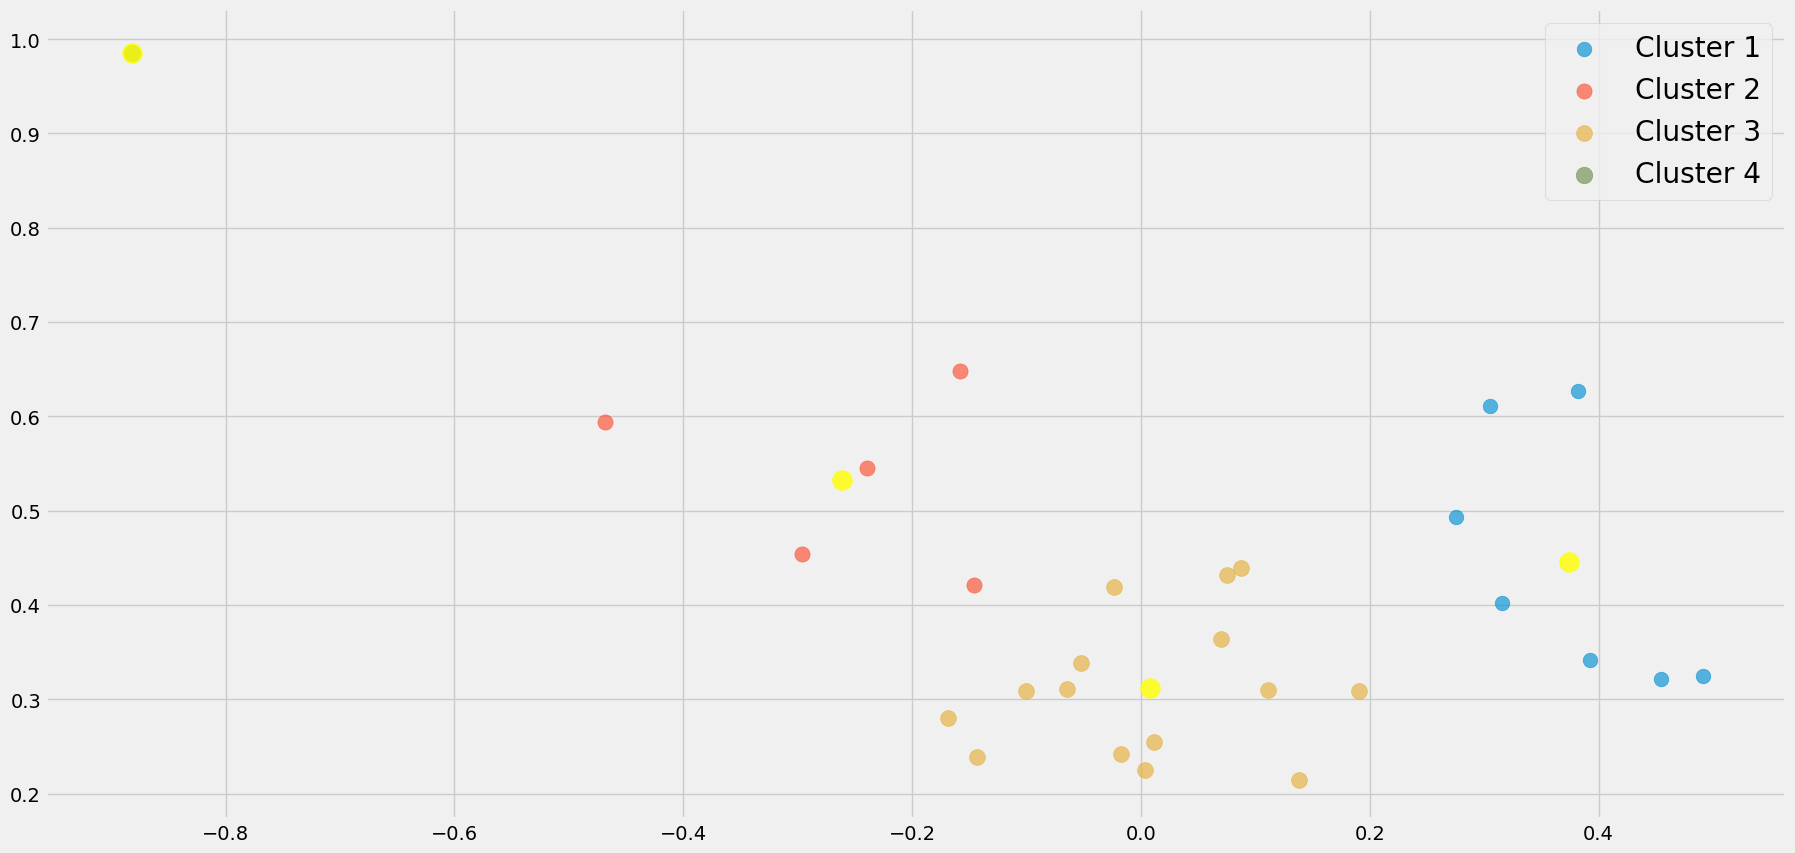

In [115]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 10))
plt.scatter(X[idx==0,0],X[idx==0,1],s=110,label='Cluster 1',alpha=0.65)
plt.scatter(X[idx==1,0],X[idx==1,1],s=120,label='Cluster 2',alpha=0.65)
plt.scatter(X[idx==2,0],X[idx==2,1],s=130,label='Cluster 3',alpha=0.65)
plt.scatter(X[idx==3,0],X[idx==3,1],s=140,label='Cluster 4',alpha=0.65)
plt.scatter(centroids[:,0],centroids[:,1],s=200 ,c='yellow', alpha = 0.8)
plt.legend(fontsize='x-large')
plt.show()

## Conclusion

Dividing stocks into groups with “similar characteristics” can help in portfolio construction to ensure we choose a collection of stocks with sufficient diversification in accordence with Modern Portfolio Theory.

For this, machine learning can go a long way as key technology.